# Atividade Prática 1

* Alunos: Giovanni Martins de Sá Júnior (2017001850), João Vitor Gato de Araújo (2017089090)
* Disciplina: Sistemas Nebulosos
* Professor: Cristiano Leite de Castro

### 1. Implementação do Fuzzy C Means(FCM):

A seguinte implementação feita do Fuzzy C Means foi feita para realizar o agrupamento de um conjunto de dados. Acerca da implementação, ele começa definindo os centros das clusters e das matrizes de pertinência de forma aleatória. De maneira prática, os centros dos clusters serão inicializados como valores aleatórios que serão normalizados ao ponto de que cada linha soma-se a 1.

No loop de execução principal, é executado um número de iterações delimitado pelo parâmetro $maxiter$ ou então caso a mudança dos centros dos clusters for menor que a tolerância $tol$. Assim, para cada cluster, o algoritmo calculará os novos centros dos clusters em cada iteração, com o auxílio da matriz de pertinência $U$ e a matriz de dados $dados$. 

Posteriormente, o algoritmo atualizará a matriz de pertinência com o auxílio dos novos centros dos clusters. Assim, ele itera em cada conjunto de dados e atualiza a pertinência do ponto para cada cluster, calculando a distância entre o ponto e os centros de cada cluster. Por último é checada a convergência, em que é feita a verificação se a mudança nos centros dos agrupamentos é menor que a tolerância $tol$ pré definida. Em caso positivo, o algoritmo encerra o loop principal, e retorna o resultado na matriz de pertinência $U$ e os centros dos agrupamentos.

In [2]:
# Importacao de Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def fcm(dados, n_clusters, m=2, max_iter=100, tol=1e-4):
    # Inicializacao dos centros aleatoriamente
    centros = np.random.rand(n_clusters, dados.shape[1])

    # Inicializacao da matriz de pertinencia U aleatoriamente
    U = np.random.rand(dados.shape[0], n_clusters)
    U = U / np.sum(U, axis=1, keepdims=True)

    for i in range(max_iter):
        # Calculo dos centros dos clusters
        centros_previos = centros.copy()
        for j in range(n_clusters):
            centros[j] = np.sum((U[:, j]**m).reshape(-1, 1) * dados, axis=0) / np.sum(U[:, j]**m)

        # Atualizacao da filiacao da matriz de pertinencia
        for i in range(dados.shape[0]):
            for j in range(n_clusters):
                U[i, j] = 1 / np.sum((np.linalg.norm(dados[i] - centros[j]) / np.linalg.norm(dados[i] - centros[k]))**(2/(m-1)) for k in range(n_clusters))

        # Checagem da convergencia
        if np.linalg.norm(centros - centros_previos) < tol:
            break

    return U, centros

### 2. Validação do Fuzzy C Means:

No segundo momento, é checado a validação do algoritmo de FCM desenvolvido na sessão anterior. Para isso, é leito a leitura do conjunto de dados inicial presente no arquivo $fcmdataset.csv$, e em seguida, a conversão do dataframe para uma matriz numpy, com o intuito de facilitar o processamento dos dados.

Em seguida, é invocada a função da implementação da Fuzzy C Means, passando com parâmetros, o conjunto de dados de entrada, e o número de clusters $nclusters$ para a resolução do problema. E por último, é plotado finalmente o resultado final com os agrupamentos definidos com seus respectivos centros marcados na cor vermelha. Como pode-se observar, foi possível ver que os agrupamentos ficaram bem definidos, assim como os seus centros.

C:\Users\marti\AppData\Local\Temp\ipykernel_2836\3718842496.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  U[i, j] = 1 / np.sum((np.linalg.norm(dados[i] - centros[j]) / np.linalg.norm(dados[i] - centros[k]))**(2/(m-1)) for k in range(n_clusters))


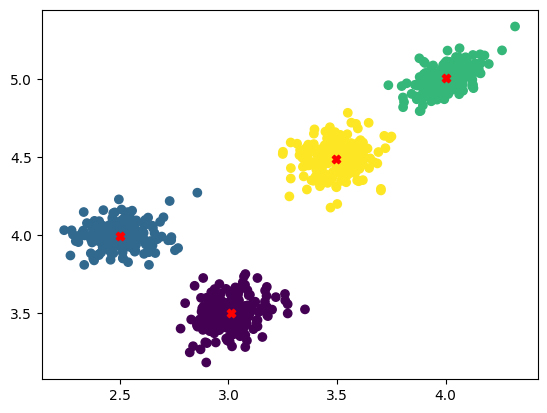

In [33]:
# Leitura do dataset
dados = pd.read_csv('fcm_dataset.csv', sep=';', header = None)
dados = dados.to_numpy()
n_clusters = 4

U, centros = fcm(dados, n_clusters)

# Atribui cada ponto de dados ao cluster com maior associacao
rotulos = np.argmax(U, axis=1)

# PLot do dataset clusterisado
plt.scatter(dados[:, 0], dados[:, 1], c=rotulos)
plt.scatter(centros[:, 0], centros[:, 1], marker='X', color='red')
plt.show()

### 3. Segmentação de Imagens por Região:

Neste terceiro, momento, realizaremos uma nova aplicação da função Fuzzy C Means, agora para a realização da segmentação não supervisionada do dataset disponibilizado pelo professor. Diante disso, serão escolhidos um número arbitrário de clusters, definidos como métrica a presença das principais cores presentes na respectiva imagem. Com isso, as imagens serão segmentadas seguindo o maior grau de pertinência em cada região.

Denotando o procedimento, será realizado o carregamento de cada imagem por meio do módulo $matplotlib$ da biblioteca $pyplot$, e então, os dados da imagens passarão por uma readequação em que cada linha representará um pixel, e as colunas representação a itensidade das cores RGB. Assim, será aplicado a função $FCM$, e por fim, a plotagem de cada imagem com os agrupamentos devidamente segmentados.

**OBSERVAÇÃO:** Neste terceiro exercício, foi enfrentado um grande problema com relação ao processamento das imagens neste exercício. Com isso, o processo de separação de clusters estavam demorando consideravelmente, levando em alguns casos, mais de uma hora para a separação dos clusters em uma única imagem, por exemplo. Na primeira implementação, presente neste arquivo, a princípio foi realizado apenas o teste com a primeira imagem. Para as outras imagens, que estão presentes na **Parte 2**, também enviada, foi realizado um procedimento de diminuir a resolução das imagens, com a plotagem dos resultados ligeiramente diferente.

#### 3.1. Imagem 01:

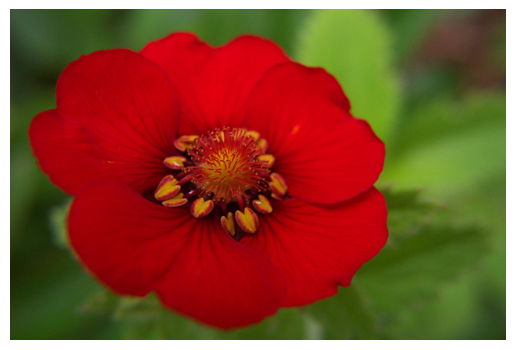

In [15]:
# Carregamento e exibicao da imagem
imagem1 = plt.imread('ImagensTeste/photo001.jpg')
plt.imshow(imagem1)
plt.axis('off')  # Opcional: Desativa os eixos
plt.show()

In [7]:
dados_img1 = np.array(imagem1)

In [10]:
dados_img1 = dados_img1.reshape((-1, 3))
n_clusters = 3

C:\Users\marti\AppData\Local\Temp\ipykernel_15196\3718842496.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  U[i, j] = 1 / np.sum((np.linalg.norm(dados[i] - centros[j]) / np.linalg.norm(dados[i] - centros[k]))**(2/(m-1)) for k in range(n_clusters))


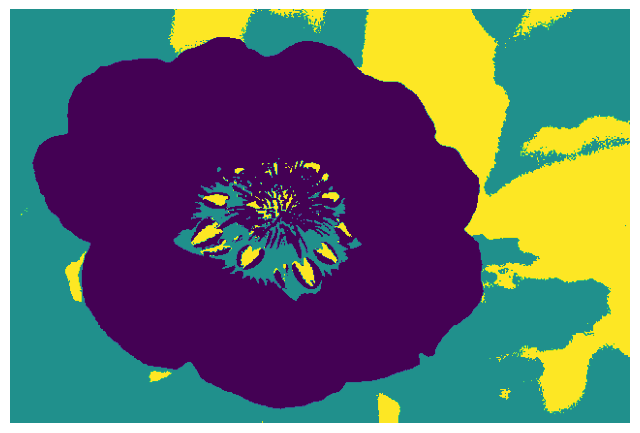

In [13]:
U, centros = fcm(dados_img1, n_clusters)
rotulos = np.argmax(U, axis=1)
altura, largura, _ = imagem.shape
rotulos = rotulos.reshape((altura, largura))
plt.figure(figsize=(8, 8))
plt.imshow(rotulos, cmap='viridis')
plt.axis('off')  # Desativa os eixos
plt.show()

#### 4. Resultados Finais

Diante dos resultados obtidos acerca das implementações do Fuzzy C Means, foi possível observar que os resultados obtidos da aplicação dependem diretamento das características dos dados, e das imagens em questão. Com relação à aplicação da FCM com imagens, ela se demonstrou uma ferramento muito poderosa para desempenhar a segmentação de regiões distintas com base em suas características.

Ademais, a seleção do número de clusters foi um fator direto na capacidade de segmentação, mas como no tempo de processamento necessário para a finalização da tarefa. Consequentemente, foi fundamental avaliar a escolha de um número adequado de clusters para o execução de uma segmentação adequada. Além disso, a qualidade da segmentação foi também afetada pela escolha de características dos dados e a métrica de similaridade para o cálculo das associações.

Um outro fator a ser analisado neste trabalho, foi a questão da sensibilidade à inicialização e aos hiperparâmetros: neste ponto, a convergência foi impactada pela inicialização dos centros e dos hiperparâmetros, como foi o caso da variável $m$, e também pelo número de iterações necessários para a resolução da convergência.

Por fim, a aplicação da função de Fuzzy C Means se mostrou uma técnica particularmente interessante para o agrupamento de dados e a segmentação de imagens. Contudo, a sua eficiência dependeu diretamente da inicialização dos parâmetros, e da configuração adequada dos hiperparâmetros (especialmente visto na Seção 3 deste trabalho).